# ДЗ №7 по теме перестройки в геноме

В этом задании предстоит разобраться, на сколько хорошо и в каких пределах, жадный алгоритм подсчета перестановок будет возвращать похожее количество перестановок на то, что было в действительности.

In [1]:
from typing import List
import random


### Симуляция (2 балла)
Будем работать в рамках Random Breakage Model - то есть считать, что разрывы могут происходить в любом месте последовательности. В примере будем пользоваться обозначением синтенных блоков числами, а их ориентацию будем обозначать знаком (+ или -).  
Симуляция заключается в следующем:  
Нужно взять последовательность чисел от 1 до 1000, после чего проделать в этой последовательности k разворотов (разворот, включает в себя смену знаков). Какие стоит выбирать k, станет понятно в последнем задании.

In [2]:
def reverse_segment(sequence: List[int], a: int, b: int):
    sequence[a:b] = sequence[a:b][::-1]
    for j in range(a, b):
        sequence[j] = -sequence[j]


In [3]:
def gen_sequence(n: int, k: int) -> List[int]:
    sequence = [i + 1 for i in range(n)]
    for _ in range(k):
        a = random.randrange(n)
        b = random.randrange(n)
        if a > b:
            a, b = b, a
        reverse_segment(sequence, a, b + 1)
    return sequence


### Жадный алгоритм сортировки поворотами (2 балла)
Напишите жадный алгоритм сортировки разворотами (см. лекцию), который в качестве ответа возвращает количество операций разворота, которые понадобилось сделать.

In [4]:
def greedy_reverse_sort(sequence: List[int]) -> int:
    sequence = sequence.copy()
    n = len(sequence)
    res = 0
    for i in range(n):
        if sequence[i] == i + 1:
            continue
        m = i
        for j in range(i, n):
            if abs(sequence[j]) == i + 1:
                m = j
                break
        reverse_segment(sequence, i, m + 1)
        res += 1
        if sequence[i] == -(i + 1):
            reverse_segment(sequence, i, i + 1)
            res += 1
    return res


### Анализ расстояния (4 балла)
Постройте график зависимости расстояния которое возвращает жадный алгоритм от реального расстояния.  Проанализируйте, что происходит при небольшом количестве поворотов и когда поворотов сделано очень много.  
Определите, при каком количестве поворотов все ломается, например, ответ отличается > чем на 25, причем жадный алгоритм возвращает меньше операций, чем происходит в симмуляции. Чтобы точнее найти количество разворотов, при котором это происходит, повторите симуляцию много раз и постройте распределение этой величины деленной на длину изначальной последовательности (1000).  
Постарайтесь объяснить, что происходит.

In [5]:
n = 1000
tested_k = []
ideal_distribution = []
greedy_distribution = []
for k in range(1, 2 * n, 20):
    exp_results = []
    for _ in range(5):
        sequence = gen_sequence(n, k)
        exp_results.append(greedy_reverse_sort(sequence))
    average_greedy_result = sum(exp_results) / len(exp_results)
    tested_k.append(k / n)
    ideal_distribution.append(k / n)
    greedy_distribution.append(average_greedy_result / n)


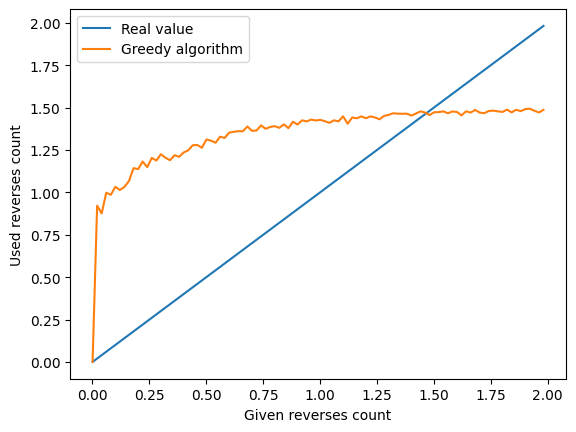

In [6]:
import matplotlib.pyplot as plt


plt.plot(tested_k, ideal_distribution)
plt.plot(tested_k, greedy_distribution)
plt.ylabel("Used reverses count")
plt.xlabel("Given reverses count")
plt.legend(["Real value", "Greedy algorithm"])
plt.show()


Объясним поведение количество разворотов жадного алгоритма.

Изначальная последовательность $[1, 2, ..., 1000]$ подвергается k разворотам. При $k > 50$ это делает перестановку похожей на случайную, при этом сам алгоритм в процессе работы делает развороты, которые, если не совпадают с теми, что были сделаны на самом деле, делает последовательность менее определенной. При $k > 1000$ изначальная последовательность выглядит совсем случайная.

Рассмотрим случайную перестановку со знаками +/- на числах. Какая вероятность, что на шаге $i$ оказалось, что элемент $i$ уже стоит на этой позиции?

$p = \frac{1}{n - i + 1}$

Если просуммировать такие вероятности для каждой позиции (посчитать матожидание в предположении, что на каждом шаге мы видим примерно независимую картину), то получается гармонический ряд. Соответственно, матожидание количество разворотов, которое все же придется сделать равно $E_1 = n - H_n \approx n$.

Теперь также посмотрим на знаки, как на случайное событие. После разворота (или при отсутствии, если он не был необходим) на позиции $i$ стоит либо $i$, либо $-i$. То есть с вероятностью $1/2$ потребуется локальный разворот этого элемента. Матожидание операций для этого случай: $E_2 = 0.5 n$.

Получается, что число операций жадного алгоритма сходится к $E_1 + E_2 \approx 1.5 n$

При $k > 1.5n$ оказывается, что жадный алгоритм (для которого эта перестановка выглядит случайной) делает меньше операций, чем произошло на самом деле, это было доказано на практике.
